<a href="https://colab.research.google.com/github/Ramaaeln/datasets-predict-students-dropout-and-academic-success/blob/main/datasets_from_ucimlrepo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALLASI PACKAGE

In [2]:
pip install ucimlrepo

##PEMANGGILAN LIBRARY



In [3]:
import ucimlrepo

##MELIHAT DATASET YANG DISEDIAKAN

In [4]:
dir(ucimlrepo)

['API_BASE_URL',
 'API_LIST_URL',
 'DATASET_FILE_BASE_URL',
 'DatasetNotFoundError',
 'Optional',
 'VALID_FILTERS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'certifi',
 'dotdict',
 'fetch',
 'fetch_ucirepo',
 'json',
 'list_available_datasets',
 'pd',
 'ssl',
 'urllib']

In [5]:
from ucimlrepo import list_available_datasets

In [6]:
data = list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

#IMPORT LIBRARY

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#FECT DATA / LOAD DATA
Datasets -> Predict Students` Dropout and Academic Success

In [8]:
data = fetch_ucirepo(id=697)

In [9]:
data

{'data': {'ids': None,
  'features':       Marital Status  Application mode  Application order  Course  \
  0                  1                17                  5     171   
  1                  1                15                  1    9254   
  2                  1                 1                  5    9070   
  3                  1                17                  2    9773   
  4                  2                39                  1    8014   
  ...              ...               ...                ...     ...   
  4419               1                 1                  6    9773   
  4420               1                 1                  2    9773   
  4421               1                 1                  1    9500   
  4422               1                 1                  1    9147   
  4423               1                10                  1    9773   
  
        Daytime/evening attendance  Previous qualification  \
  0                              1              

In [10]:
df = pd.DataFrame(data.data.original)

In [11]:
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


#Exploratory Data Analysis (EDA)

In [12]:
print("First 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())
print("\nClass distribution:")
print(df['Target'].value_counts())

First 5 rows:
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                       

#VISUALISASI

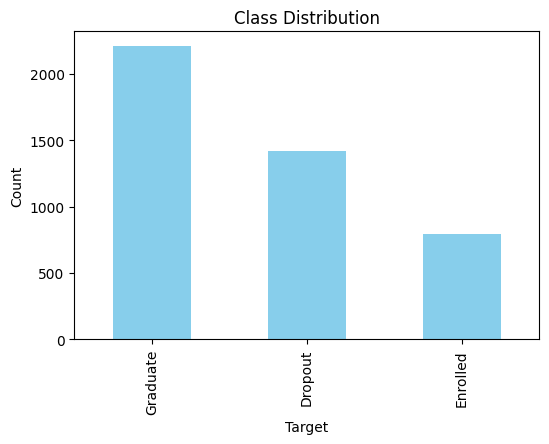

In [13]:
plt.figure(figsize=(6, 4))
df['Target'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

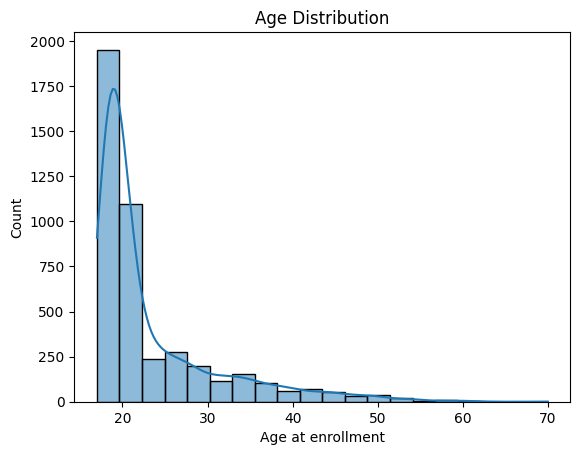

In [14]:
sns.histplot(df['Age at enrollment'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

#PREPOCESSING
mengubah/mengkonversi data menjadi numerik

In [15]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


#Standardization (Scaling)
Menyusun data agar fitur memiliki rata-rata 0 dan deviasi standar 1

In [16]:
scaler = StandardScaler()
features = df.drop('Target', axis=1)
target = df['Target']
features_scaled = scaler.fit_transform(features)


#PENGUJIAN DATA

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42, stratify=target)

#MODELING - NAIVE BAIYES

In [26]:
nb_model = GaussianNB()


In [27]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred_nb = nb_model.predict(X_test)

#EVALUASI





In [29]:
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Akurasi Naive Bayes: 0.6587570621468927
Confusion Matrix:
 [[189  32  63]
 [ 40  29  90]
 [ 32  45 365]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69       284
           1       0.27      0.18      0.22       159
           2       0.70      0.83      0.76       442

    accuracy                           0.66       885
   macro avg       0.57      0.56      0.56       885
weighted avg       0.63      0.66      0.64       885



#MODELING - DECISIONTREE

In [20]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
y_pred_dt = dt.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       284
           1       0.56      0.34      0.42       159
           2       0.76      0.95      0.84       442

    accuracy                           0.76       885
   macro avg       0.72      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



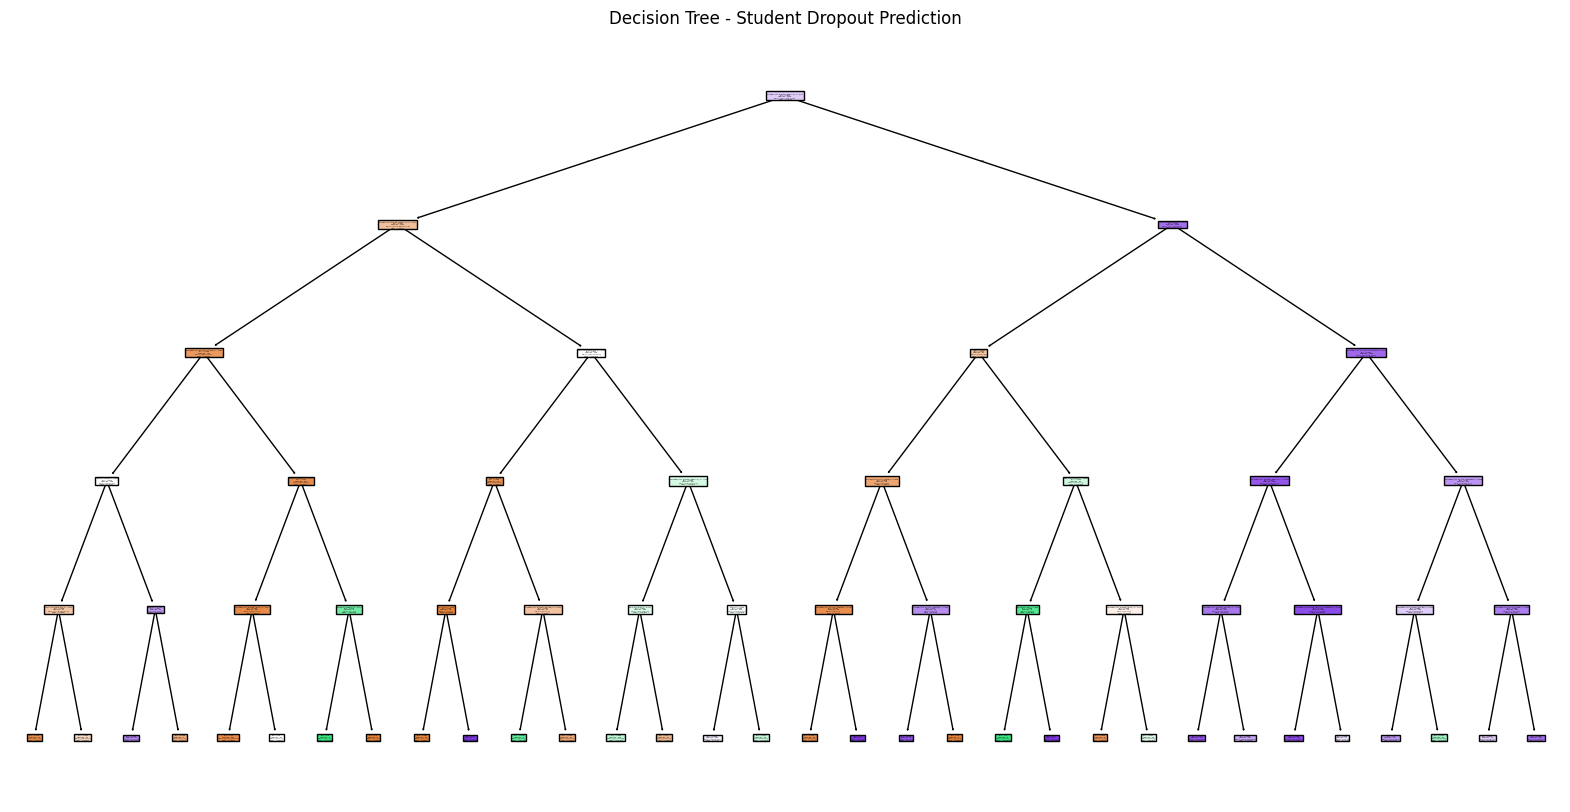

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features.columns, class_names=['Dropout', 'Graduate', 'Enrolled'], filled=True)
plt.title("Decision Tree - Student Dropout Prediction")
plt.show()

#Feature Importance

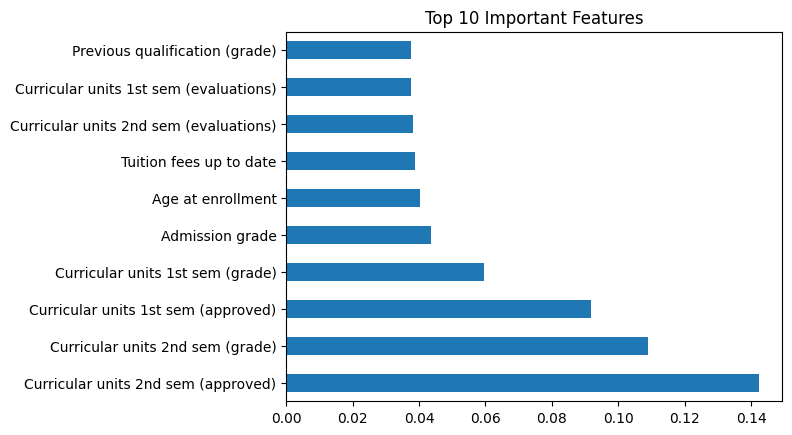

In [23]:
importances = pd.Series(clf.feature_importances_, index=features.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

#Clustering

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)
df['Cluster'] = kmeans.labels_

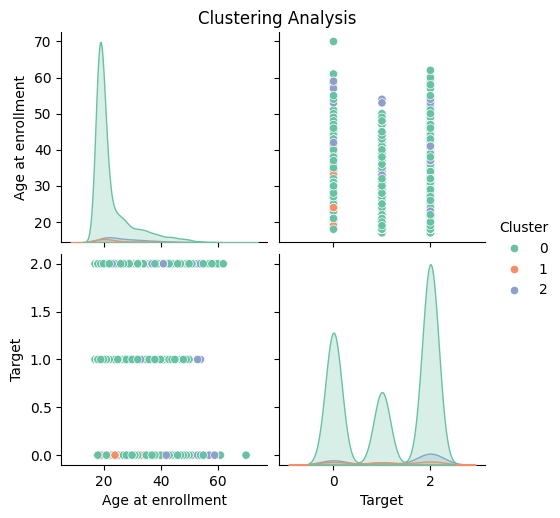

In [25]:
sns.pairplot(df[['Age at enrollment', 'Cluster', 'Target']], hue='Cluster', palette='Set2')
plt.suptitle("Clustering Analysis", y=1.02)
plt.show()